## Chapter 12: Using axisartist Toolkit

### Understanding attributes of axisartist

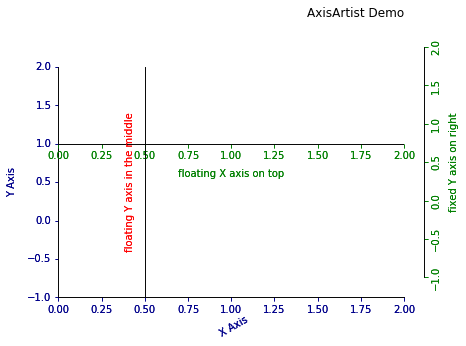

In [2]:
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as AxisArtist

fig = plt.figure()
ax = AxisArtist.Axes(fig, [0.1, 0.1, 0.8, 0.8])
fig.add_axes(ax)

ax.axis["right", "top"].set_visible(False)
ax.set_xlabel("X Axis")
ax.axis["bottom"].label.set_rotation(30)
ax.set_ylabel("Y Axis")

ax.axis["y=1"] = ax.new_floating_axis(nth_coord=0, value=1.0)
ax.axis["y=1"].label.set_text("floating X axis on top")

ax.axis["x=0.5"] = ax.new_floating_axis(nth_coord=1, value=0.5)
ax.axis["x=0.5"].set_axis_direction("top")
ax.axis["x=0.5"].label.set_text("floating Y axis in the middle")

ax.axis["right"] = ax.new_fixed_axis(loc="right", offset=(20, 20))
ax.axis["right"].set_axis_direction("bottom")
ax.axis["right"].label.set_text("fixed Y axis on right")

ax.axis["left", "bottom"].major_ticks.set_color("darkblue")
ax.axis["left", "bottom"].major_ticklabels.set_color("darkblue")
ax.axis["left", "bottom"].label.set_color("darkblue")

ax.axis["right", "y=1"].major_ticks.set_color("green")
ax.axis["right", "y=1"].major_ticklabels.set_color("green")
ax.axis["right", "y=1"].label.set_color("green")

ax.axis[:].major_ticks.set_tick_out(True)
ax.axis[:].label.set_pad(10)
ax.set_xlim(0,2)
ax.set_ylim(-1,2)

ax.axis["x=0.5"].toggle(all=False, label=True)
ax.axis["x=0.5"].label.set_color("red")

ax.set_title('AxisArtist Demo', pad=50, loc='right')

plt.show()

### Defining curvilinear grid in rectangular box

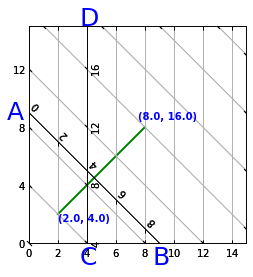

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist import Subplot
from mpl_toolkits.axisartist.grid_helper_curvelinear import GridHelperCurveLinear

fig = plt.figure(1, figsize=(7, 4))

# Transformation Function to convert curvilinear co-ordinates to rectilinear co-ordinates
def curv2rect_tr(x, y):
    x, y = np.asarray(x), np.asarray(y)
    return x, y - x 

# Transformation Function to convert rectilinear co-ordinates to curvilinear co-ordinates
def rect2curv_tr(x, y):
    x, y = np.asarray(x), np.asarray(y)
    return x, y + x

grid_helper = GridHelperCurveLinear((curv2rect_tr, rect2curv_tr))
ax = Subplot(fig, 1, 1, 1, grid_helper=grid_helper)
fig.add_subplot(ax)

x, y = curv2rect_tr([2.0, 8.0], [4.0, 16.0])
ax.plot(x, y, linewidth=2.0, color='g')

ax.set_aspect(1.)
ax.set_xlim(0, 15.)
ax.set_ylim(0, 15.)

ax.axis["0"] = ax.new_floating_axis(nth_coord=0, value=4.0)
ax.axis["0"].set_ticklabel_direction('+')
ax.axis["1"] = ax.new_floating_axis(1, 9.0)
ax.axis["1"].set_ticklabel_direction('-')

ax.grid(True)

ax.text(-1.5, 8.5, 'A', size=25, weight=50, color='b')
ax.text(8.5, -1.5, 'B', size=25, weight=50, color='b')
ax.text(3.5, -1.5, 'C', size=25, weight=50, color='b')
ax.text(3.5, 15, 'D', size=25, weight=50, color='b')
ax.text(2.0, 1.5, '(2.0, 4.0)', weight='bold', color='b')
ax.text(7.5, 8.5, '(8.0, 16.0)', weight='bold', color='b')

plt.show()

### Defining polar axes in rectangular box

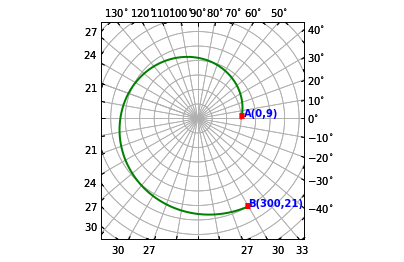

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axisartist.grid_helper_curvelinear import GridHelperCurveLinear
import mpl_toolkits.axisartist.angle_helper as angle_helper
from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D
from mpl_toolkits.axisartist import SubplotHost, ParasiteAxesAuxTrans
import matplotlib.cbook as cbook
from mpl_toolkits.axisartist.grid_finder import MaxNLocator

fig = plt.figure(1, figsize=(7, 4))

# PolarAxes.PolarTransform needs angle units as radian. However, we plot the coordinate system in degrees 
# for easier visualisation

curv2rect_tr = Affine2D().scale(np.pi/180., 1.) + PolarAxes.PolarTransform()

#(25, 25) is the number of steps it takes from minimum limit to maximum limit for x and y
# number of grid lines(circular for radius, diagonal for angle) will be influenced by these steps
extreme_finder = angle_helper.ExtremeFinderCycle(25, 25,
                                                 lon_cycle=360,
                                                 lat_cycle=None,
                                                 lon_minmax=None,
                                                 lat_minmax=(0, 50))

# determine grid values appropriate for the coordinate (degree, minute, second).
grid_locator1 = angle_helper.LocatorDMS(30)

# Use an appropriate formatter to show angle values in degree, minute and second format.  
tick_formatter1 = angle_helper.FormatterDMS()

# determine grid values for the radius
grid_locator2 = MaxNLocator(12)

grid_helper = GridHelperCurveLinear(curv2rect_tr,
                                    extreme_finder=extreme_finder,
                                    grid_locator1=grid_locator1,
                                    tick_formatter1=tick_formatter1,
                                    grid_locator2=grid_locator2)

ax = SubplotHost(fig, 1, 1, 1, grid_helper=grid_helper)

# make ticklabels of right and top axis visible.
ax.axis["right", "top"].major_ticklabels.set_visible(True)

#Map angle ticks to right axis and radius ticks to bottom axis
ax.axis["right"].get_helper().nth_coord_ticks = 0
ax.axis["bottom"].get_helper().nth_coord_ticks = 1

fig.add_subplot(ax)

#Define a parasite axes and append it to main axes
axp = ParasiteAxesAuxTrans(ax, curv2rect_tr)
ax.parasites.append(axp)

intp = cbook.simple_linear_interpolation
axp.plot(intp(np.array([0, 75, 180, 300]), 100),
         intp(np.array([9., 12., 16, 21]), 100),
         linewidth=2.0, color='g')

axp.text(0,7.5, '.', color='r', size=50)
axp.text(3,9.5, 'A(0,9)', color='b', weight='bold')
axp.text(295, 20.5, '.', color='r', size=50)
axp.text(300,21, 'B(300,21)', color='b', weight='bold')

ax.set_aspect(1.0)
ax.set_xlim(-20, 22)
ax.set_ylim(-25, 20)

ax.grid(True, zorder=0)

plt.show()

### Using Floating axes for a rectangular plot

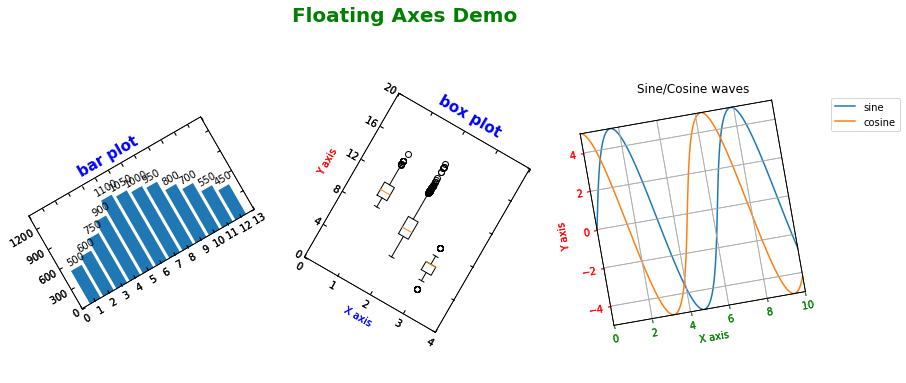

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
#import calendar

fig = plt.figure(1, figsize=(14, 6))

#prepare data for the bar plot
month_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
units_sold = [500, 600, 750, 900, 1100, 1050, 1000, 950, 800, 700, 550, 450]

# Define Transformation function for bar plot
curv2rect_tr1 = Affine2D().scale(200, 1).rotate_deg(30)

grid_helper1 = floating_axes.GridHelperCurveLinear(curv2rect_tr1, extremes=(0, 13, 0, 1400))
ax1 = floating_axes.FloatingSubplot(fig, 131, grid_helper=grid_helper1)
fig.add_subplot(ax1)
axp1 = ax1.get_aux_axes(curv2rect_tr1)

bars = axp1.bar(month_num, units_sold)
for bar in bars:
    height = bar.get_height()
    axp1.text(bar.get_x() + bar.get_width()/2., 1.002*height,'%d' % int(height), ha='center', va='bottom', rotation=30)

grid_helper1.grid_finder.grid_locator1._nbins = 14  # X axis ticks
grid_helper1.grid_finder.grid_locator2._nbins = 5   # Y axis ticks
# change the month format from number to corresponding month name on x-axis. 
#axp.set_xticks(month_num, calendar.month_name[1:13], rotation=20)

# Title for bar plot, changed position from 1800 to 1900 for 3.0
axp1.text(5, 1900, 'bar plot', rotation=30, size=15, weight='bold', color='b')

# Read the data from a csv file into pandas data frame for box plot
wine_quality = pd.read_csv('winequality.csv', delimiter=';')
data = [wine_quality['alcohol'], wine_quality['fixed acidity'], wine_quality['quality']]

curv2rect_tr2 = Affine2D().scale(4, 1).rotate_deg(-30)
grid_helper2 = floating_axes.GridHelperCurveLinear(curv2rect_tr2, extremes=(0, 4, 0, 20))
ax2 = floating_axes.FloatingSubplot(fig, 132, grid_helper=grid_helper2)
fig.add_subplot(ax2)
axp2 = ax2.get_aux_axes(curv2rect_tr2)
axp2.boxplot(data)

grid_helper2.grid_finder.grid_locator1._nbins = 4
grid_helper2.grid_finder.grid_locator2._nbins = 5
axp2.text(1, 21, 'box plot', rotation=-30, size=15, weight='bold', color='b')
ax2.axis["bottom"].label.set_text('X axis')
ax2.axis["bottom"].label.set_color('blue')
ax2.axis["left"].label.set_text('Y axis')
ax2.axis["left"].label.set_color('red')

x = np.linspace(0, 10, 100)
curv2rect_tr3 = Affine2D().scale(1, 1).rotate_deg(10)
grid_helper3 = floating_axes.GridHelperCurveLinear(curv2rect_tr3, extremes=(0, 10, -5, 5))
ax3 = floating_axes.FloatingSubplot(fig, 133, grid_helper=grid_helper3)
fig.add_subplot(ax3)

axp3 = ax3.get_aux_axes(curv2rect_tr3)
axp3.plot(x, 5*np.sin(x), label='sine')
axp3.plot(x, 5*np.cos(x), label='cosine')
ax3.legend(bbox_to_anchor=(0.35, 0., 1.05, 1.0), borderaxespad=0)
ax3.set_title('Sine/Cosine waves')
ax3.grid()

grid_helper3.grid_finder.grid_locator1._nbins = 5
grid_helper3.grid_finder.grid_locator2._nbins = 5

ax3.axis["bottom"].label.set_text('X axis')
ax3.axis["bottom"].label.set_color('green')
ax3.axis["bottom"].major_ticks.set_color("green")
ax3.axis["bottom"].major_ticklabels.set_color("green")
ax3.axis["left"].label.set_text('Y axis')
ax3.axis["left"].label.set_color('red')
ax3.axis["left"].major_ticks.set_color("red")
ax3.axis["left"].major_ticklabels.set_color("red")
ax3.axis["bottom", "left"].major_ticks.set_tick_out(True)
ax3.axis["top", "right"].major_ticks.set_visible(False)

plt.suptitle('Floating Axes Demo',size=20, weight='bold', color='g')
#plt.tight_layout()   # Commented for 3.0
plt.show()

### Creating Polar axes using floating axes

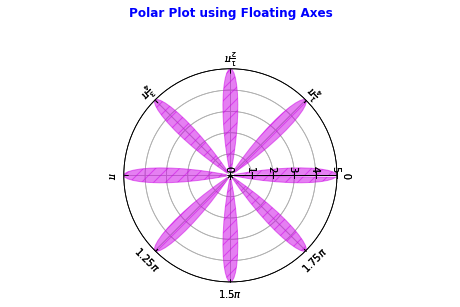

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist.grid_finder import (FixedLocator, MaxNLocator, DictFormatter)

#plt.style.use('seaborn')

fig = plt.figure(1, figsize=(8, 4))

curv2rect_tr = PolarAxes.PolarTransform()

pi = np.pi
angle_ticks = [(0, r"$0$"),
               (.25*pi, r"$\frac{1}{4}\pi$"),
               (.5*pi, r"$\frac{1}{2}\pi$"),
               (.75*pi, r"$\frac{3}{4}\pi$"),
               ( pi, r"$\pi$"),
               (1.25*pi, r"$1.25\pi$"),
               (1.5*pi, r"$1.5\pi$"),
               (1.75*pi, r"$1.75\pi$")]

grid_locator1   = FixedLocator([value for value, string in angle_ticks])
tick_formatter1 = DictFormatter(dict(angle_ticks))
grid_locator2   = MaxNLocator(5)

grid_helper     = floating_axes.GridHelperCurveLinear(curv2rect_tr, extremes=(2*pi, 0, 5, 0),
                                                 grid_locator1=grid_locator1,
                                                 grid_locator2=grid_locator2,
                                                 tick_formatter1=tick_formatter1,
                                                 tick_formatter2=None)

main_axes = floating_axes.FloatingSubplot(fig, 111, grid_helper=grid_helper)
fig.add_subplot(main_axes)

# create a parasite axes 
parasite_ax = main_axes.get_aux_axes(curv2rect_tr)
main_axes.grid(True, zorder=0)
theta = np.arange(0., 2., 1./180.)*np.pi
parasite_ax.fill(theta, 5*np.cos(8*theta), color=(0.8,0.0,0.9), hatch='//', alpha=0.5, zorder=1)
main_axes.set_title('Polar Plot using Floating Axes', weight='bold', color='b', pad=50)

plt.show()

### Plotting planetary system data on floating polar axes

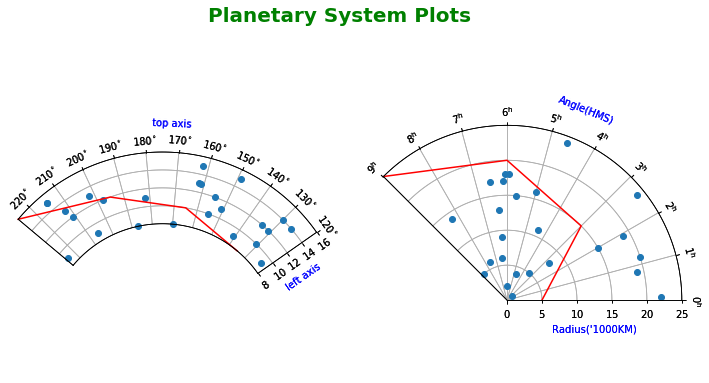

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
from matplotlib.projections import PolarAxes
import mpl_toolkits.axisartist.angle_helper as angle_helper
from mpl_toolkits.axisartist.grid_finder import MaxNLocator

# Fixing random state for reproducibility
np.random.seed(19681211)

fig = plt.figure(1, figsize=(12, 6))

curv2rect_tr1 = Affine2D().translate(-85, 5).scale(np.pi/180., 1.) + PolarAxes.PolarTransform()
grid_locator1 = angle_helper.LocatorDMS(10)
tick_formatter1 = angle_helper.FormatterDMS()
grid_locator2 = MaxNLocator(4)

# Specify angle co-ordinate limits in degrees
langle, uangle = 120., 225.
# Specify radial co-ordinate limits in '1000 km
lradius, uradius = 8, 16

grid_helper1 = floating_axes.GridHelperCurveLinear(curv2rect_tr1, extremes=(langle, uangle, lradius, uradius),
                                    grid_locator1=grid_locator1, grid_locator2=grid_locator2,
                                    tick_formatter1=tick_formatter1, tick_formatter2=None)

main_axes1 = floating_axes.FloatingSubplot(fig, 121, grid_helper=grid_helper1)
fig.add_subplot(main_axes1)

def set_axis_attr(axes, leftlabel, toplabel):
    axes.axis["bottom"].toggle(all=False)  # by default all are visible, this makes them all invisible
    axes.axis["right"].toggle(all=False)   # by default ticks are visible, so this will make them invisible

    axes.axis["left"].set_axis_direction("bottom")
    axes.axis["left"].label.set(text=leftlabel, color='blue')

    axes.axis["top"].toggle(all=True)      # by default label and ticklabels are invisible, this will make them visible
    axes.axis["top"].set_axis_direction("bottom")
    axes.axis["top"].major_ticklabels.set_axis_direction("top")
    axes.axis["top"].label.set_axis_direction("top")
    axes.axis["top"].label.set(text=toplabel, color='blue')

    axes.axis[:].major_ticks.set_tick_out(True)

set_axis_attr(main_axes1, "left axis", "top axis")

parasite_axes1 = main_axes1.get_aux_axes(curv2rect_tr1)

theta = np.random.randint(langle, uangle, 25)  # in degrees
radius = np.random.randint(lradius, uradius, 25)
parasite_axes1.scatter(theta, radius)
parasite_axes1.plot([135, 165, 195, 225], [8, 10, 12, 16], color='r')

main_axes1.grid(True, zorder=0)

#2nd plot starts here
curv2rect_tr2 = Affine2D().scale(np.pi/180., 1.) + PolarAxes.PolarTransform()
grid_locator3 = angle_helper.LocatorHMS(10)
tick_formatter3 = angle_helper.FormatterHMS()
grid_locator4 = MaxNLocator(5)

langle, uangle = 0., 135.
lradius, uradius = 0, 25

grid_helper2 = floating_axes.GridHelperCurveLinear(curv2rect_tr2, extremes=(langle, uangle, lradius, uradius),
                                    grid_locator1=grid_locator3,
                                    grid_locator2=grid_locator4,
                                    tick_formatter1=tick_formatter3,
                                    tick_formatter2=None)

main_axes2 = floating_axes.FloatingSubplot(fig, 122, grid_helper=grid_helper2)
fig.add_subplot(main_axes2)

set_axis_attr(main_axes2, "Radius('1000KM)", "Angle(HMS)")
parasite_axes2 = main_axes2.get_aux_axes(curv2rect_tr2)

theta = np.random.randint(langle, uangle, 25)  # in degrees
radius = np.random.randint(lradius, uradius, 25)
parasite_axes2.scatter(theta, radius)
parasite_axes2.plot([0, 45, 90, 135], [5, 15, 20, 25], color='r')
main_axes2.grid(True, zorder=0)

plt.suptitle('Planetary System Plots',size=20, weight='bold', color='g')

plt.show()